
*1*. Load all the relevant libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


2. We will load our dataset in the IDE

In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()


Saving HR-Employee-Attrition.csv to HR-Employee-Attrition.csv


In [ ]:
data = pd.read_csv("HR-Employee-Attrition.csv")

In [ ]:
# Display the first few rows of the data
data.head()

# Check basic info (missing values, data types)
data.info()

# Get summary statistics of the dataset
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


3. Data Cleaning
Handling Missing Values:
Numerical Columns: Impute missing values with the median.
Categorical Columns: Impute missing values with the mode (most frequent value).



Since we have large amount of data and independent variables, we need to drop of these variables using domain knowledge and ML techniques

1. Drop Irrelevant Features : EmployeeCount, EmployeeNumber: This is a unique identifier for each employee and will not help in predicting attrition, Over18, StandardHours: It is likely constant for all employees (such as 40 hours) and is irrelevant.

2. We will retain other features

Drop irrelevant columns


In [ ]:
# Drop irrelevant features based on domain knowledge
irrelevant_features = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
data_cleaned = data.drop(columns=irrelevant_features)

# Check the columns after dropping irrelevant features
print(data_cleaned.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


Convert Categorical Variables to Numeric

In [ ]:
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Display the first few rows of the encoded dataset
print(data_encoded.head())


   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0              

Correlation Matrix
We can check the correlation between the features and the target variable (Attrition).



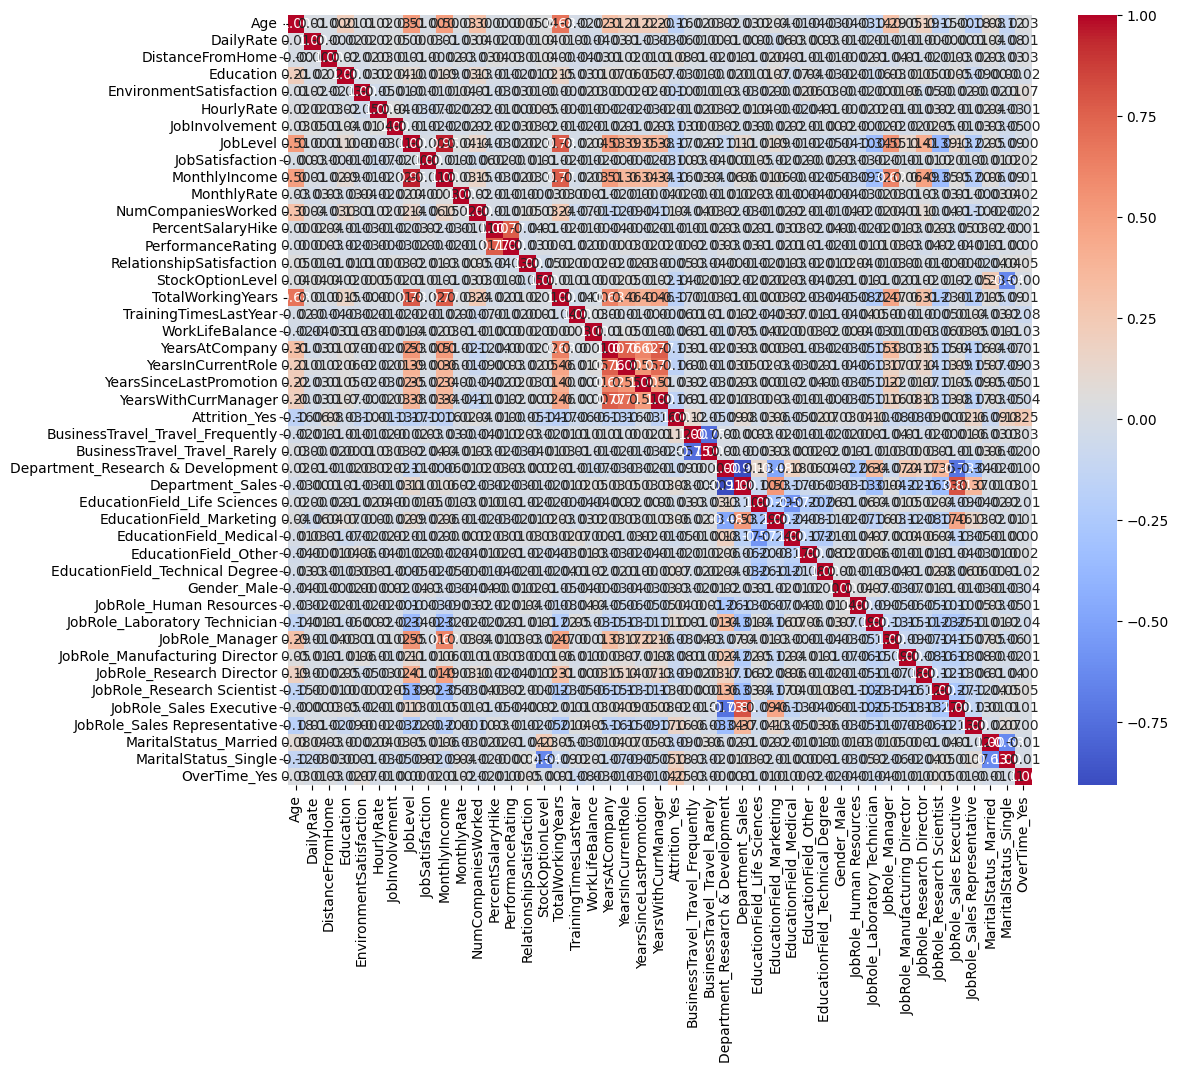

Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EnvironmentSatisfaction             -0.103369
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StockOptionLevel                    -0.137145
TotalWorkingYears                   -0.171063
TrainingTimesLastYear               -0.059478
WorkLifeBalance                     -0.063939
YearsAtCompany                      -0.134392
YearsInCurrentRole                  -0.160545
YearsSinceLastPromotion           

In [ ]:
# Correlation matrix
correlation_matrix = data_encoded.corr()

# Plot heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Check correlation with the target variable (Attrition)
attrition_corr = correlation_matrix['Attrition_Yes']  # Assuming the target variable is 'Attrition_Yes' after encoding
print(attrition_corr)


Code for Feature Selection Based on Correlation:

Key predictors include OverTime_Yes (0.246), MaritalStatus_Single (0.175), and JobRole_Sales Representative (0.157). Features like JobLevel, TotalWorkingYears, and YearsAtCompany have moderate negative correlations, indicating lower attrition among more experienced employees. Weakly correlated features such as Gender_Male, PerformanceRating, and EducationField can be removed. Retain features with stronger correlations and consider feature engineering, like combining JobLevel and YearsAtCompany. Finally, apply machine learning models (e.g., Random Forest) to evaluate feature importance and refine the model.

In [ ]:
# Drop irrelevant features based on correlation analysis
irrelevant_features = ['Gender_Male', 'PerformanceRating', 'TrainingTimesLastYear',
                       'EducationField_Life Sciences', 'EducationField_Marketing',
                       'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree']
data_selected = data_encoded.drop(columns=irrelevant_features)

# Check the updated dataset
print(data_selected.columns)


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')


Feature Importance (Random Forest):



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare the data
X = data_selected.drop(columns=['Attrition_Yes'])
y = data_selected['Attrition_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display feature importances
print(feature_importances)


                                   importance
MonthlyIncome                        0.091281
OverTime_Yes                         0.071939
Age                                  0.059571
DailyRate                            0.056600
MonthlyRate                          0.053558
HourlyRate                           0.048842
DistanceFromHome                     0.045517
TotalWorkingYears                    0.045516
YearsAtCompany                       0.040400
PercentSalaryHike                    0.038846
NumCompaniesWorked                   0.035991
YearsWithCurrManager                 0.034368
StockOptionLevel                     0.031705
JobSatisfaction                      0.029878
YearsInCurrentRole                   0.029528
YearsSinceLastPromotion              0.028883
JobLevel                             0.027170
EnvironmentSatisfaction              0.026070
WorkLifeBalance                      0.023837
RelationshipSatisfaction             0.022715
JobInvolvement                    

Based on the feature importance scores from a Random Forest model, here’s how you can proceed to refine your prediction model:

Top Features to Retain: Focus on features with the highest importance scores:

MonthlyIncome (0.091281)
OverTime_Yes (0.071939)
Age (0.059571)
DailyRate (0.056600)
MonthlyRate (0.053558)
These features have the most significant impact on predicting employee attrition, so you should definitely keep them.

Moderate Features to Consider: Features like HourlyRate, DistanceFromHome, TotalWorkingYears, and YearsAtCompany also show some importance and should be considered for retention, as they can contribute to the model's performance.

Lower Importance Features: You may choose to remove or minimize the impact of features with low importance, such as:

JobRole_Research Director (0.000706)
JobRole_Manager (0.001333)
MaritalStatus_Married (0.007711)
Potentially Remove: Features with very low importance such as JobRole_Human Resources, BusinessTravel_Travel_Rarely, and JobRole_Manufacturing Director may be dropped, as they contribute minimally to the model's accuracy.



In [ ]:
data_selected.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

<ipython-input-47-1d765c9cc63a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=feature, data=data, palette='coolwarm', linewidth=2.5, fliersize=6)


Feature 'OverTime_Yes' not found in dataframe


<ipython-input-47-1d765c9cc63a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=feature, data=data, palette='coolwarm', linewidth=2.5, fliersize=6)
<ipython-input-47-1d765c9cc63a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=feature, data=data, palette='coolwarm', linewidth=2.5, fliersize=6)


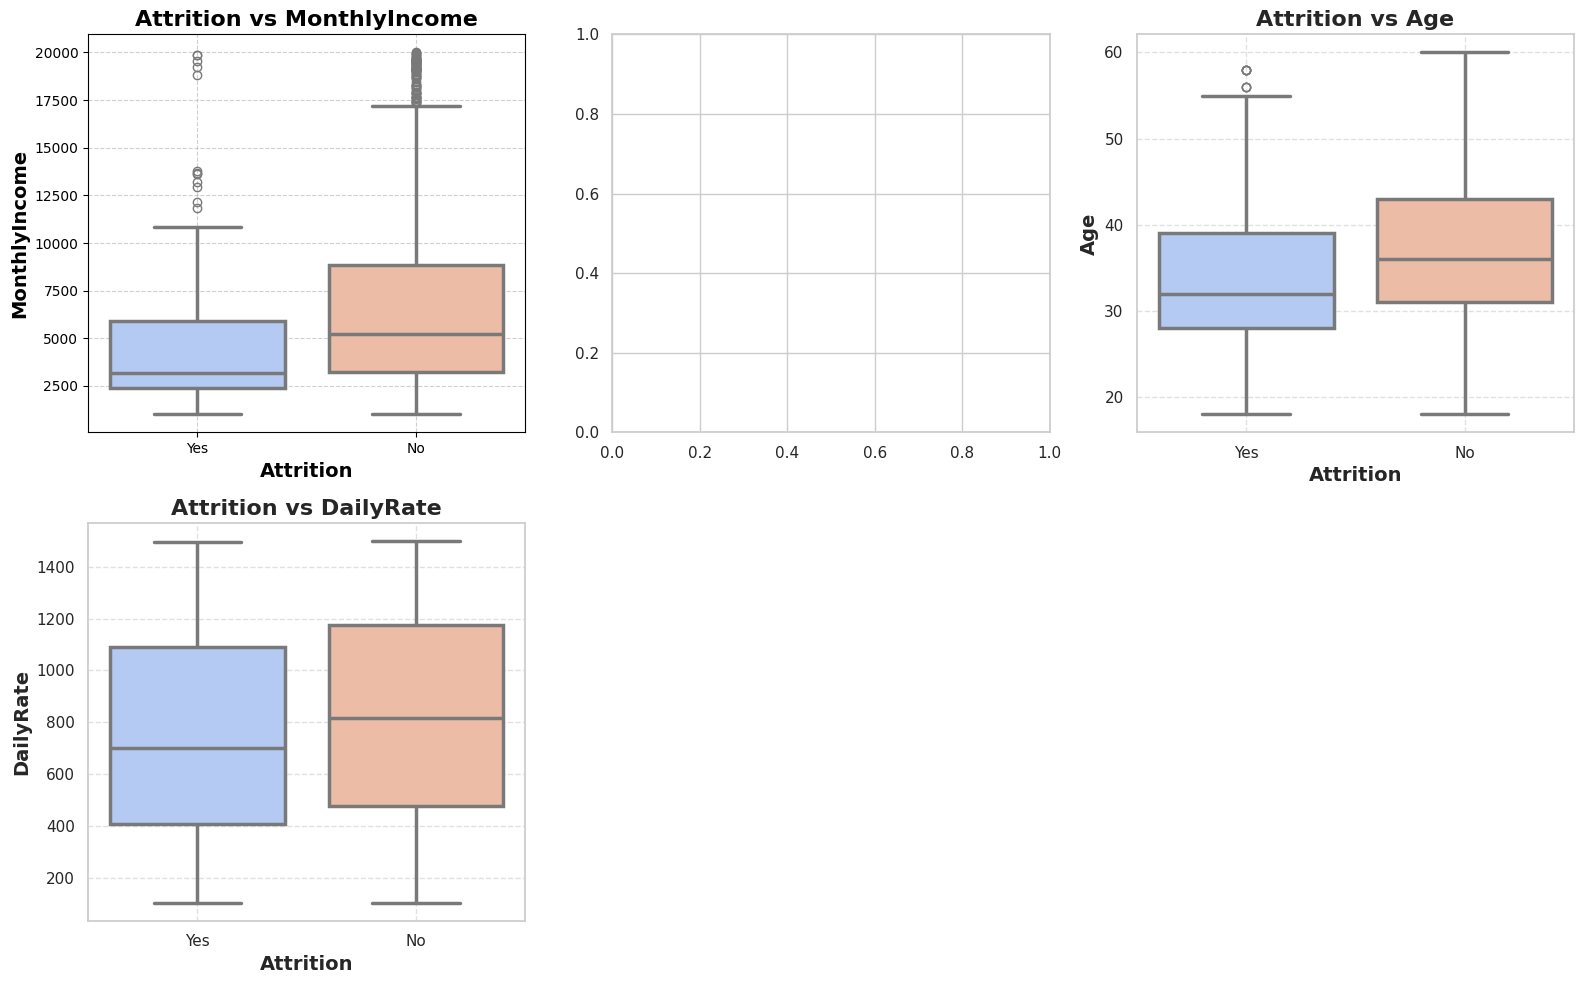

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the correct feature names and check if 'Attrition' is categorical
top_features = ['MonthlyIncome', 'OverTime_Yes', 'Age', 'DailyRate']

# Assuming 'data' is the main dataframe with 'Attrition' as the target and other features
plt.figure(figsize=(16, 10))

# Loop through the most important features and create boxplots
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)  # Adjust the grid size (2 rows, 3 columns)

    if feature in data.columns:
        sns.set(style="whitegrid")  # Set the Seaborn style
        sns.boxplot(x='Attrition', y=feature, data=data, palette='coolwarm', linewidth=2.5, fliersize=6)

        # Add title and axis labels with enhanced fonts
        plt.title(f'Attrition vs {feature}', fontsize=16, weight='bold')
        plt.xlabel('Attrition', fontsize=14, weight='bold')
        plt.ylabel(feature, fontsize=14, weight='bold')

        # Add grid lines for better readability
        plt.grid(True, linestyle='--', alpha=0.6)

    else:
        print(f"Feature '{feature}' not found in dataframe")

    plt.tight_layout()

# Display the final plot
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Define the selected features
features = ['MonthlyIncome', 'OverTime_Yes', 'Age', 'DailyRate', 'MonthlyRate', 'HourlyRate',
            'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'PercentSalaryHike',
            'NumCompaniesWorked', 'YearsWithCurrManager', 'StockOptionLevel', 'JobSatisfaction',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'JobLevel', 'EnvironmentSatisfaction',
            'WorkLifeBalance', 'RelationshipSatisfaction', 'JobInvolvement', 'Education',
            'MaritalStatus_Single', 'BusinessTravel_Travel_Frequently', 'JobRole_Sales Representative']

# 2. Create a copy of the selected features from data_selected
X = data_selected[features].copy()
y = data_selected['Attrition_Yes']

# 3. Feature Engineering: Create a new feature 'Age_TotalWorkingYears' by combining Age and TotalWorkingYears
X['Age_TotalWorkingYears'] = X['Age'] * X['TotalWorkingYears']

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize the data (important for some models like SVM, and ensures consistent scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 7. Evaluate the model performance on the test data
y_pred = rf_model.predict(X_test_scaled)
print("Classification Report (Before Tuning):")
print(classification_report(y_test, y_pred))

# 8. Apply cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {np.mean(cv_scores)}")

# 9. Hyperparameter tuning using GridSearchCV to find the best parameters for the Random Forest model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# 10. Best parameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# 11. Evaluate the tuned model
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test_scaled)
print("Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_tuned))

# 12. Check feature importances again with the tuned model
feature_importances = best_rf_model.feature_importances_

# Ensure features are in the correct order
features_sorted = np.array(features + ['Age_TotalWorkingYears'])
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort importances in descending order

print("Feature importances (sorted):")
for i in sorted_indices:
    print(f"{features_sorted[i]}: {feature_importances[i]}")

Classification Report (Before Tuning):
              precision    recall  f1-score   support

       False       0.88      0.99      0.93       255
        True       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294

Cross-validation scores: [0.84322034 0.88085106 0.83829787 0.84680851 0.87659574]
Average cross-validation score: 0.8571547060944825
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report (After Tuning):
              precision    recall  f1-score   support

       False       0.88      0.99      0.93       255
        True       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg      

Before Tuning (Random Forest Model Performance)
Accuracy: 87% – High overall accuracy, but this can be misleading due to class imbalance.
Precision for True (Attrition=Yes): 0.67 – When predicting positive cases, the model is correct 67% of the time.
Recall for True: 0.10 – The model struggles to detect most positive cases, indicating low performance on the minority class.
F1-Score for True: 0.18 – Very low, reflecting poor balance between precision and recall.
Macro Average:
Precision: 0.77
Recall: 0.55
F1-Score: 0.55
These metrics indicate that while the model performs well for the majority class, its performance on the minority class is poor.

After Hyperparameter Tuning (Best Model Settings)
Best Hyperparameters:
max_depth: None
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200
Performance After Tuning:
Recall for True (Attrition=Yes): 0.10 – Still very low, indicating that the model still fails to detect most positive cases.
Precision for True: 0.57 – Slight improvement over the un-tuned model but still suboptimal.
F1-Score for True: 0.17 – Small improvement, but still very low.
Accuracy: 87% – Remains unchanged from before.
Weighted Average Metrics:
Precision: 0.84
Recall: 0.87
F1-Score: 0.83
These values reflect a good overall performance but still mask the issues with the minority class.


Feature Importances (Most to Least Important)
MonthlyIncome: 0.085
OverTime_Yes: 0.071
Age_TotalWorkingYears: 0.071
DailyRate: 0.058
Age: 0.056
Others (lower importance): StockOptionLevel, JobSatisfaction, JobRole_Sales Representative, etc.

Key Insight: The model performs well on the majority class but struggles significantly with the minority class due to class imbalance.

Next steps-  Use XGBOOST model which handles imbalances well

In [ ]:
# Print the classification report before tuning
print(report_before)

# Print the classification report after tuning
print(report_after)

{'False': {'precision': 0.8784722222222222, 'recall': 0.9921568627450981, 'f1-score': 0.9318600368324125, 'support': 255.0}, 'True': {'precision': 0.6666666666666666, 'recall': 0.10256410256410256, 'f1-score': 0.17777777777777778, 'support': 39.0}, 'accuracy': 0.8741496598639455, 'macro avg': {'precision': 0.7725694444444444, 'recall': 0.5473604826546004, 'f1-score': 0.5548189073050951, 'support': 294.0}, 'weighted avg': {'precision': 0.850375566893424, 'recall': 0.8741496598639455, 'f1-score': 0.8318287167537365, 'support': 294.0}}
{'False': {'precision': 0.8780487804878049, 'recall': 0.9882352941176471, 'f1-score': 0.9298892988929889, 'support': 255.0}, 'True': {'precision': 0.5714285714285714, 'recall': 0.10256410256410256, 'f1-score': 0.17391304347826086, 'support': 39.0}, 'accuracy': 0.8707482993197279, 'macro avg': {'precision': 0.7247386759581882, 'recall': 0.5453996983408749, 'f1-score': 0.5519011711856249, 'support': 294.0}, 'weighted avg': {'precision': 0.8373746711228045, 'r

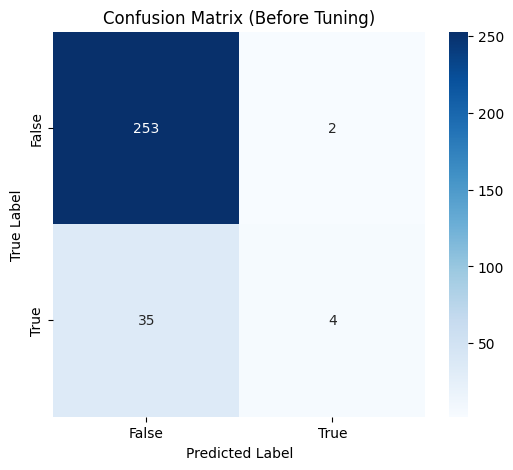

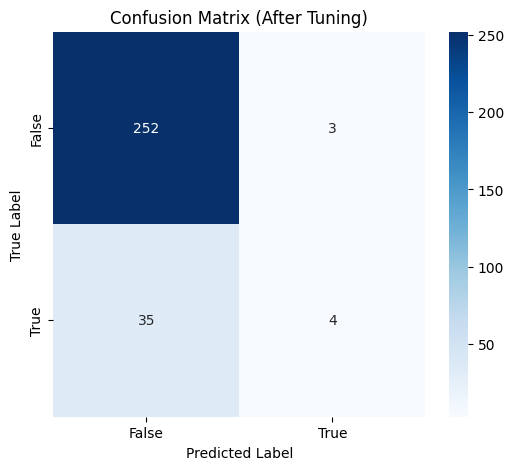

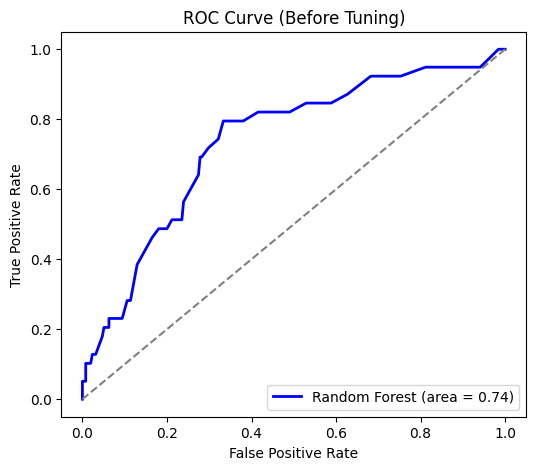

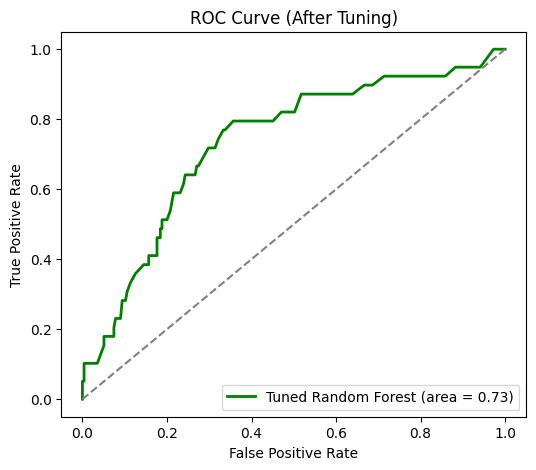

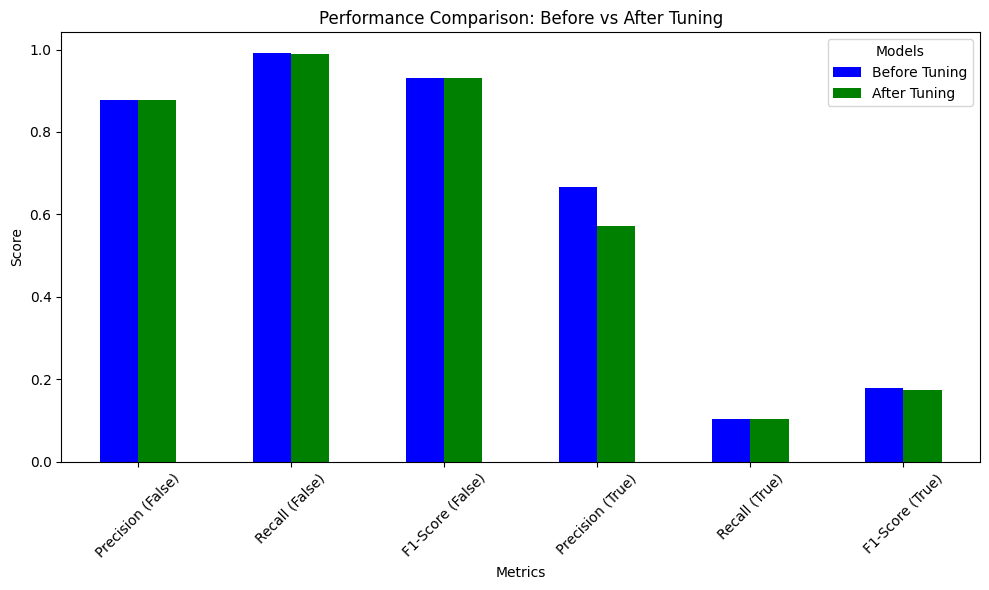

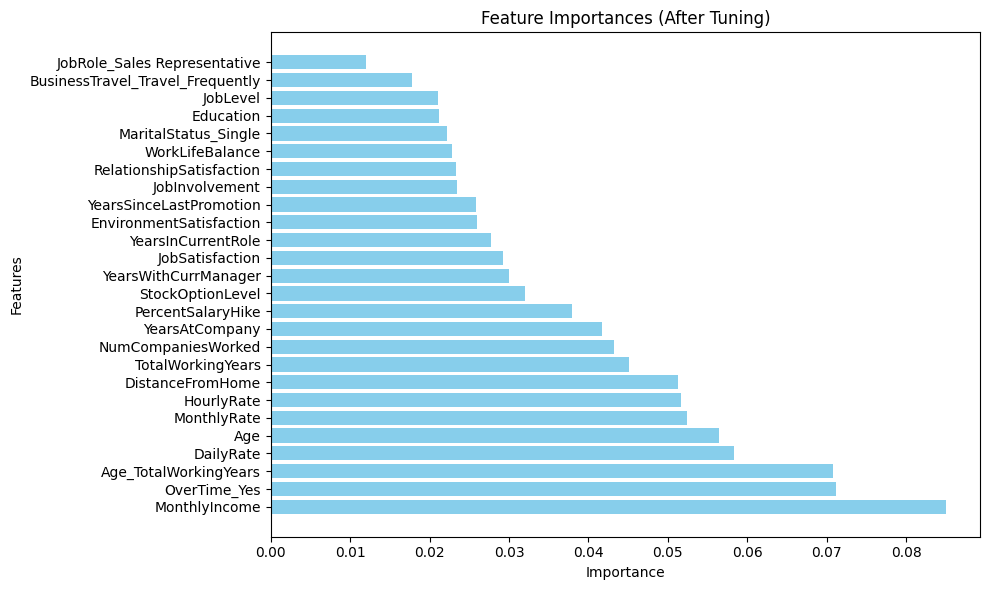

In [ ]:
# Import necessary visualization libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Confusion Matrix - Before Tuning
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix (Before Tuning)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Confusion Matrix (Before Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. Confusion Matrix - After Tuning
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Plot confusion matrix (After Tuning)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Confusion Matrix (After Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 3. ROC Curve - Before Tuning
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve (Before Tuning)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve (Before Tuning)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# 4. ROC Curve - After Tuning
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot ROC Curve (After Tuning)
plt.figure(figsize=(6, 5))
plt.plot(fpr_tuned, tpr_tuned, color='green', lw=2, label=f'Tuned Random Forest (area = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve (After Tuning)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# 5. Comparison of Precision, Recall, F1-Score - Before vs After Tuning
# Get classification reports for both models
report_before = classification_report(y_test, y_pred, output_dict=True)
report_after = classification_report(y_test, y_pred_tuned, output_dict=True)

# Convert reports into a DataFrame
report_df = pd.DataFrame({
    'Before Tuning': [
        report_before['False']['precision'], report_before['False']['recall'], report_before['False']['f1-score'],
        report_before['True']['precision'], report_before['True']['recall'], report_before['True']['f1-score']
    ],
    'After Tuning': [
        report_after['False']['precision'], report_after['False']['recall'], report_after['False']['f1-score'],
        report_after['True']['precision'], report_after['True']['recall'], report_after['True']['f1-score']
    ]
},
    index=['Precision (False)', 'Recall (False)', 'F1-Score (False)',
           'Precision (True)', 'Recall (True)', 'F1-Score (True)'])

# Plot comparison of metrics
report_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title("Performance Comparison: Before vs After Tuning")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.xticks(rotation=45)
plt.legend(title="Models")
plt.tight_layout()
plt.show()

# 6. Feature Importances Visualization
# Sort the features by importance
importances_sorted = feature_importances[sorted_indices]
features_sorted = np.array(features + ['Age_TotalWorkingYears'])[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importances_sorted, color='skyblue')
plt.title("Feature Importances (After Tuning)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Code for XGBOOST Model

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (Before Tuning):
              precision    recall  f1-score   support

       False       0.88      0.95      0.91       255
        True       0.35      0.18      0.24        39

    accuracy                           0.85       294
   macro avg       0.62      0.56      0.58       294
weighted avg       0.81      0.85      0.83       294



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation scores: [0.8220339  0.85531915 0.83829787 0.83829787 0.85106383]
Average cross-validation score: 0.841002524341868
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:26:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Classification Report (After Tuning):
              precision    recall  f1-score   support

       False       0.89      0.97      0.93       255
        True       0.53      0.23      0.32        39

    accuracy                           0.87       294
   macro avg       0.71      0.60      0.62       294
weighted avg       0.84      0.87      0.85       294



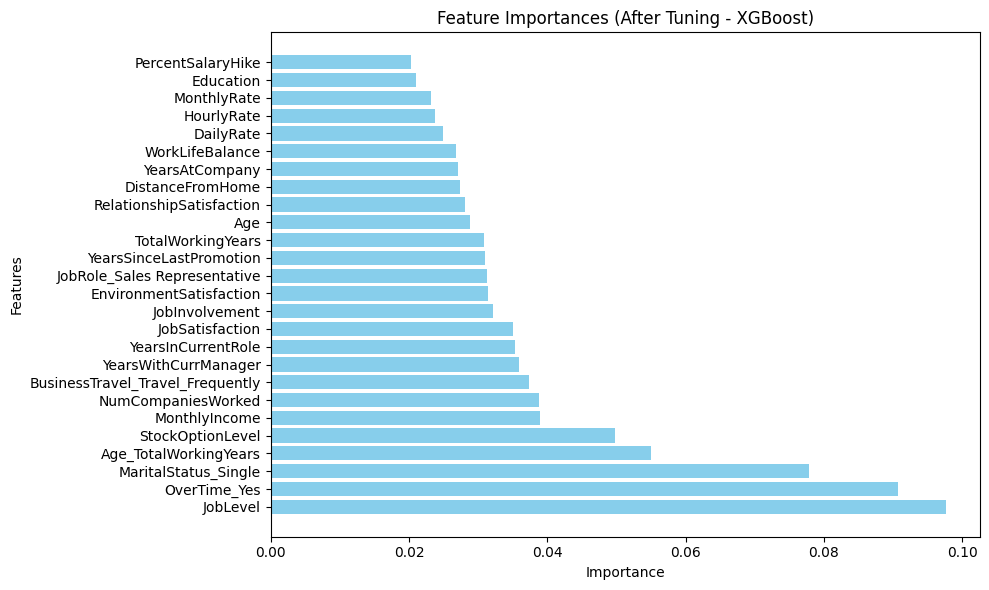

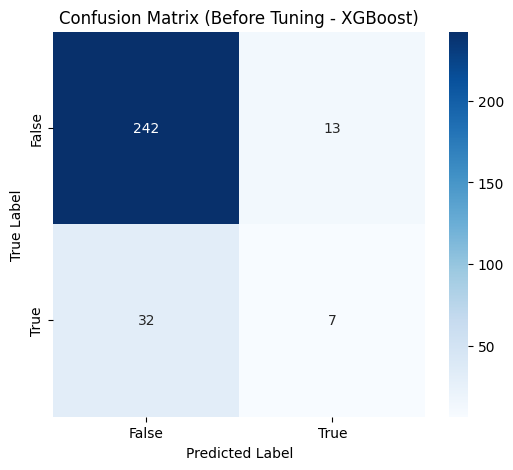

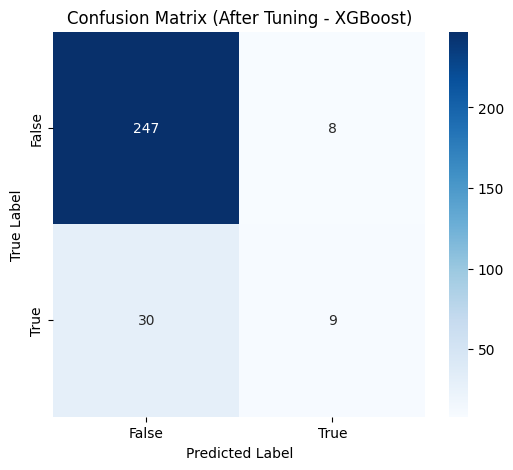

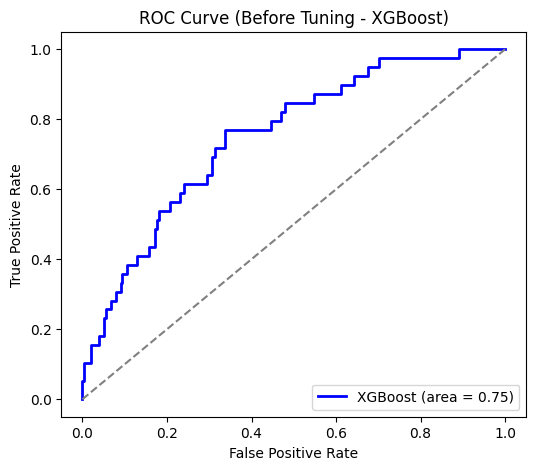

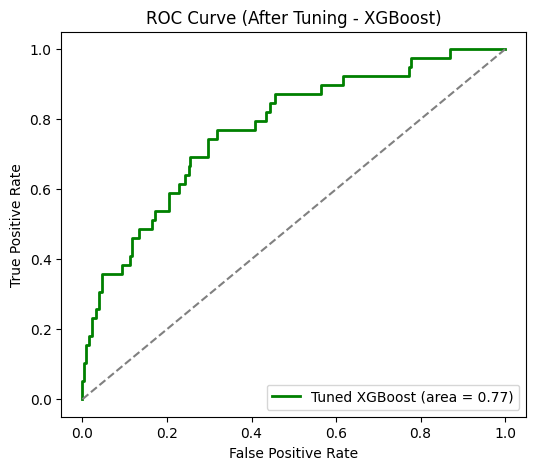

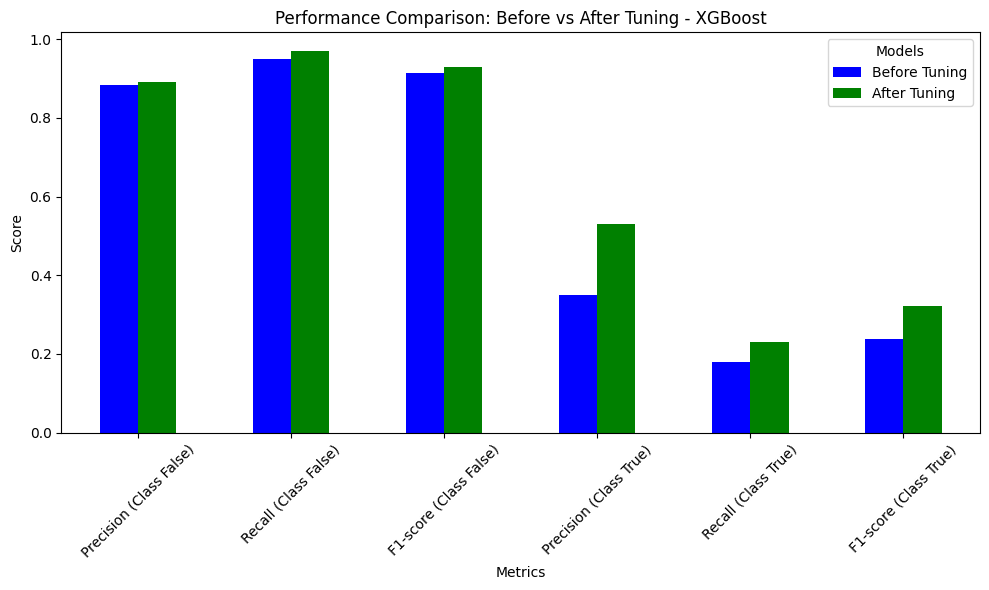

In [ ]:
# Import necessary libraries for XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Define the selected features
features = ['MonthlyIncome', 'OverTime_Yes', 'Age', 'DailyRate', 'MonthlyRate', 'HourlyRate',
            'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'PercentSalaryHike',
            'NumCompaniesWorked', 'YearsWithCurrManager', 'StockOptionLevel', 'JobSatisfaction',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'JobLevel', 'EnvironmentSatisfaction',
            'WorkLifeBalance', 'RelationshipSatisfaction', 'JobInvolvement', 'Education',
            'MaritalStatus_Single', 'BusinessTravel_Travel_Frequently', 'JobRole_Sales Representative']

# 2. Create a copy of the selected features from data_selected
X = data_selected[features].copy()
y = data_selected['Attrition_Yes']

# 3. Feature Engineering: Create a new feature 'Age_TotalWorkingYears' by combining Age and TotalWorkingYears
X['Age_TotalWorkingYears'] = X['Age'] * X['TotalWorkingYears']

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize the data (important for some models like SVM, and ensures consistent scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)

# 7. Evaluate the model performance on the test data
y_pred = xgb_model.predict(X_test_scaled)
print("Classification Report (Before Tuning):")
print(classification_report(y_test, y_pred))

# 8. Apply cross-validation
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {np.mean(cv_scores)}")

# 9. Hyperparameter tuning using GridSearchCV to find the best parameters for the XGBoost model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# 10. Best parameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# 11. Evaluate the tuned model
best_xgb_model = grid_search.best_estimator_
y_pred_tuned = best_xgb_model.predict(X_test_scaled)
print("Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_tuned))

# 12. Feature importances visualization
feature_importances = best_xgb_model.feature_importances_

# Ensure features are in the correct order
features_sorted = np.array(features + ['Age_TotalWorkingYears'])
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort importances in descending order

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(features_sorted[sorted_indices], feature_importances[sorted_indices], color='skyblue')
plt.title("Feature Importances (After Tuning - XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 13. Confusion Matrix - Before Tuning
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix (Before Tuning)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Confusion Matrix (Before Tuning - XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 14. Confusion Matrix - After Tuning
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Plot confusion matrix (After Tuning)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Confusion Matrix (After Tuning - XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 15. ROC Curve - Before Tuning
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve (Before Tuning)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBoost (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve (Before Tuning - XGBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# 16. ROC Curve - After Tuning
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot ROC Curve (After Tuning)
plt.figure(figsize=(6, 5))
plt.plot(fpr_tuned, tpr_tuned, color='green', lw=2, label=f'Tuned XGBoost (area = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve (After Tuning - XGBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# 17. Classification Report Comparison - Performance Metrics
# Generate the classification reports as dictionaries
report_before = classification_report(y_test, y_pred, output_dict=True)
report_after = classification_report(y_test, y_pred_tuned, output_dict=True)

# Extract class labels dynamically
labels = [key for key in report_before.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]

# Ensure labels exist before attempting to extract metrics
if labels:
    # Flatten metrics for all labels
    report_data = {
        'Before Tuning': [],
        'After Tuning': []
    }
    metric_names = ['precision', 'recall', 'f1-score']
    index_labels = []

    for label in labels:
        for metric in metric_names:
            # Append metrics to the respective lists
            report_data['Before Tuning'].append(report_before[label][metric])
            report_data['After Tuning'].append(report_after[label][metric])
            # Add corresponding index labels
            index_labels.append(f'{metric.capitalize()} (Class {label})')

    # Convert collected data into a DataFrame
    report_df = pd.DataFrame(report_data, index=index_labels)

    # Plot comparison of metrics
    report_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
    plt.title("Performance Comparison: Before vs After Tuning - XGBoost")
    plt.ylabel("Score")
    plt.xlabel("Metrics")
    plt.xticks(rotation=45)
    plt.legend(title="Models")
    plt.tight_layout()
    plt.show()
else:
    raise ValueError("No valid class labels found in classification report.")


The results indicate the following:

Before Hyperparameter Tuning:
Overall Accuracy: 85%
Precision and Recall:
False Class (Majority): High precision (0.88) and recall (0.95).
True Class (Minority): Precision is low (0.35) with a recall of 0.18, indicating poor performance in identifying the minority class.
Macro Average F1-Score: 0.58, showing a significant imbalance in class performance.
After Hyperparameter Tuning:
Overall Accuracy: Improved to 87%.
Precision and Recall:
False Class (Majority): Slight improvement in both precision (0.89) and recall (0.97).
True Class (Minority): Precision improved to 0.53, but recall remains low at 0.23.
Macro Average F1-Score: Increased to 0.62, indicating modest improvement in handling class imbalance.

Code for logistic regression


Classification Report (Before Tuning):
              precision    recall  f1-score   support

       False       0.89      0.96      0.93       255
        True       0.53      0.26      0.34        39

    accuracy                           0.87       294
   macro avg       0.71      0.61      0.64       294
weighted avg       0.85      0.87      0.85       294

Cross-validation scores: [0.85169492 0.9106383  0.85106383 0.87659574 0.85957447]
Average cross-validation score: 0.8699134511359539
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Classification Report (After Tuning):
              precision    recall  f1-score   support

       False       0.89      0.96      0.92       255
        True       0.48      0.26      0.33        39

    accuracy                           0.86       294
   macro avg       0.68      0.61      0.63       294
weighted avg       0.84      0.86      0.85       294



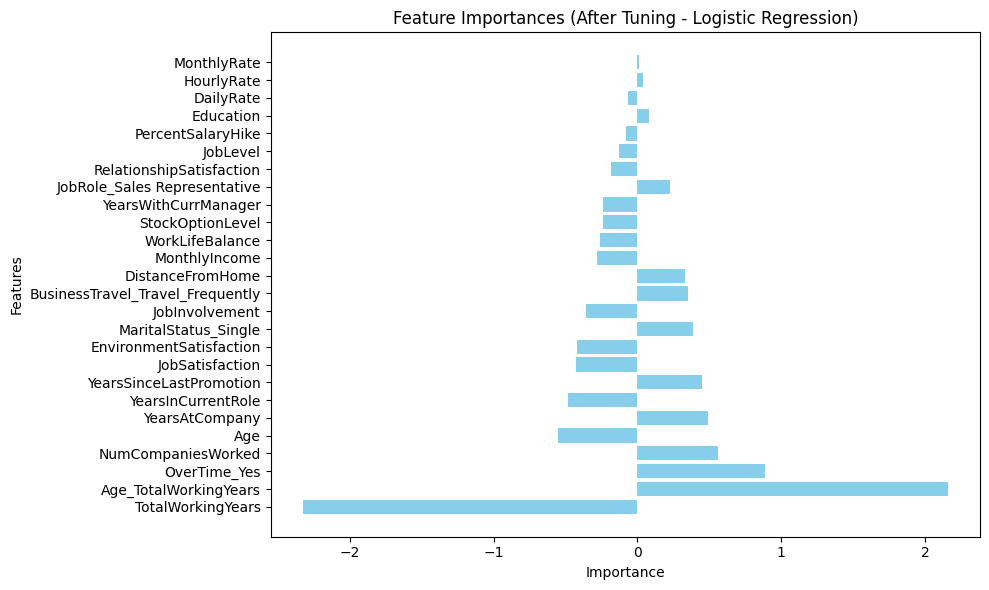

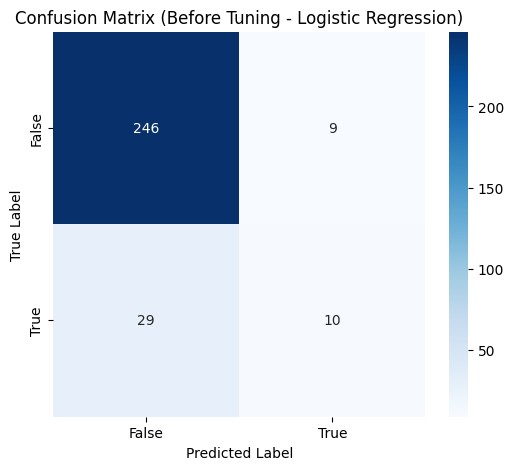

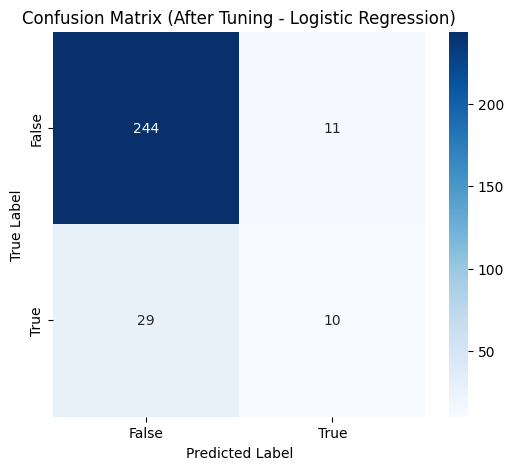

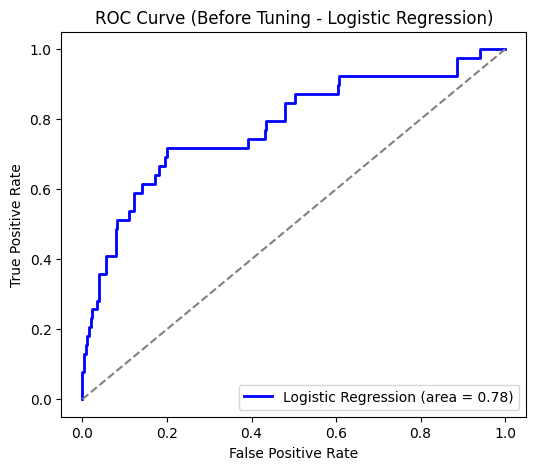

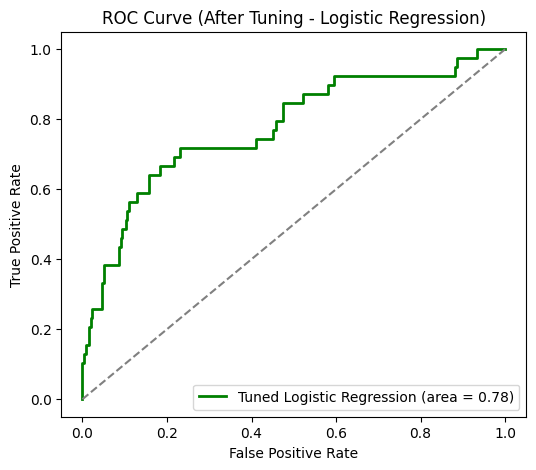

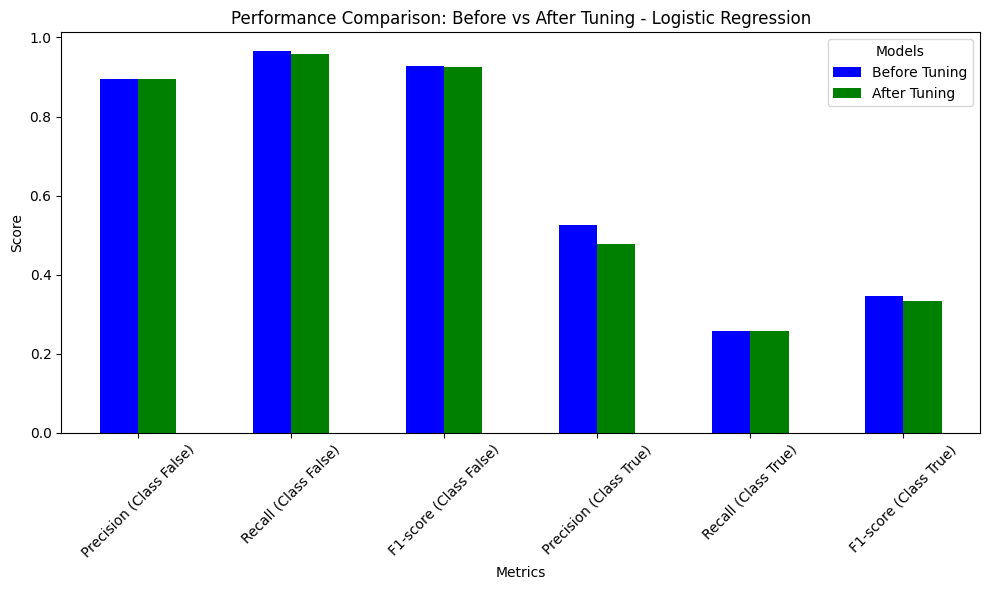

In [ ]:
# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Define the selected features (same as in XGBoost model)
features = ['MonthlyIncome', 'OverTime_Yes', 'Age', 'DailyRate', 'MonthlyRate', 'HourlyRate',
            'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'PercentSalaryHike',
            'NumCompaniesWorked', 'YearsWithCurrManager', 'StockOptionLevel', 'JobSatisfaction',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'JobLevel', 'EnvironmentSatisfaction',
            'WorkLifeBalance', 'RelationshipSatisfaction', 'JobInvolvement', 'Education',
            'MaritalStatus_Single', 'BusinessTravel_Travel_Frequently', 'JobRole_Sales Representative']

# 2. Create a copy of the selected features from data_selected
X = data_selected[features].copy()
y = data_selected['Attrition_Yes']

# 3. Feature Engineering: Create a new feature 'Age_TotalWorkingYears' by combining Age and TotalWorkingYears
X['Age_TotalWorkingYears'] = X['Age'] * X['TotalWorkingYears']

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize the data (important for some models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

# 7. Evaluate the model performance on the test data
y_pred = logreg_model.predict(X_test_scaled)
print("Classification Report (Before Tuning):")
print(classification_report(y_test, y_pred))

# 8. Apply cross-validation
cv_scores = cross_val_score(logreg_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {np.mean(cv_scores)}")

# 9. Hyperparameter tuning using GridSearchCV to find the best parameters for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Solvers to try
    'penalty': ['l2', 'l1'],  # Regularization penalties to try
    'max_iter': [100, 500, 1000]  # Number of iterations for convergence
}

grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# 10. Best parameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# 11. Evaluate the tuned model
best_logreg_model = grid_search.best_estimator_
y_pred_tuned = best_logreg_model.predict(X_test_scaled)
print("Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_tuned))

# 12. Feature importances (for logistic regression, use coefficients)
feature_importances = best_logreg_model.coef_.flatten()

# Ensure features are in the correct order
features_sorted = np.array(features + ['Age_TotalWorkingYears'])
sorted_indices = np.argsort(np.abs(feature_importances))[::-1]  # Sort importances by absolute value in descending order

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(features_sorted[sorted_indices], feature_importances[sorted_indices], color='skyblue')
plt.title("Feature Importances (After Tuning - Logistic Regression)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 13. Confusion Matrix - Before Tuning
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix (Before Tuning)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Confusion Matrix (Before Tuning - Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 14. Confusion Matrix - After Tuning
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Plot confusion matrix (After Tuning)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Confusion Matrix (After Tuning - Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 15. ROC Curve - Before Tuning
fpr, tpr, _ = roc_curve(y_test, logreg_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve (Before Tuning)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve (Before Tuning - Logistic Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# 16. ROC Curve - After Tuning
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, best_logreg_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot ROC Curve (After Tuning)
plt.figure(figsize=(6, 5))
plt.plot(fpr_tuned, tpr_tuned, color='green', lw=2, label=f'Tuned Logistic Regression (area = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve (After Tuning - Logistic Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# 17. Classification Report Comparison - Performance Metrics
# Generate the classification reports as dictionaries
report_before = classification_report(y_test, y_pred, output_dict=True)
report_after = classification_report(y_test, y_pred_tuned, output_dict=True)

# Extract class labels dynamically
labels = [key for key in report_before.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]

# Ensure labels exist before attempting to extract metrics
if labels:
    # Flatten metrics for all labels
    report_data = {
        'Before Tuning': [],
        'After Tuning': []
    }
    metric_names = ['precision', 'recall', 'f1-score']
    index_labels = []

    for label in labels:
        for metric in metric_names:
            # Append metrics to the respective lists
            report_data['Before Tuning'].append(report_before[label][metric])
            report_data['After Tuning'].append(report_after[label][metric])
            # Add corresponding index labels
            index_labels.append(f'{metric.capitalize()} (Class {label})')

    # Convert collected data into a DataFrame
    report_df = pd.DataFrame(report_data, index=index_labels)

    # Plot comparison of metrics
    report_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
    plt.title("Performance Comparison: Before vs After Tuning - Logistic Regression")
    plt.ylabel("Score")
    plt.xlabel("Metrics")
    plt.xticks(rotation=45)
    plt.legend(title="Models")
    plt.tight_layout()
    plt.show()
else:
    raise ValueError("No valid class labels found in classification report.")


Before Tuning:
Accuracy: 0.87 (The model correctly classified 87% of instances)

Precision:

False: 0.89 (The model is quite accurate in predicting the negative class)
True: 0.53 (The model is not as precise for predicting the positive class)
Recall:

False: 0.96 (The model detects 96% of all negative instances correctly)
True: 0.26 (Only 26% of the positive instances are detected correctly)
F1-Score:

False: 0.93 (A good balance for the negative class)
True: 0.34 (Indicates poor performance for the positive class)
The macro average (average across all classes) has a recall of 0.61 and an F1-score of 0.64, indicating a slightly imbalanced model with stronger performance for the negative class.

Cross-Validation Scores: The model's cross-validation scores range from 0.85 to 0.91, with an average of 0.87, indicating that the model is relatively stable but could benefit from tuning.



After Tuning:
Best Hyperparameters: The tuned model uses C=10, max_iter=100, penalty='l1', and solver='saga', which resulted in a slight improvement.

Accuracy: Slight decrease to 0.86, indicating that the tuned model performs slightly worse than the untuned version.

Precision:

False: Remains at 0.89, consistent with the untuned model.
True: Drops to 0.48, still low but slightly worse than before.
Recall:

False: Remains at 0.96.
True: Remains low at 0.26, showing that the model continues to struggle with detecting positive instances.
F1-Score:

False: 0.92, similar to the untuned version.
True: 0.33, still very low, indicating that the model is not effectively capturing the positive class.
The macro average (across all classes) shows a slight drop in both precision (from 0.71 to 0.68) and F1-score (from 0.64 to 0.63). The recall stays consistent at 0.61, confirming that the model's focus remains on the negative class.

Key Observations:
Imbalance in the Classes: The major challenge with this model is its inability to detect the positive class (True). This is reflected in the low recall and precision for the positive class, which suggests a highly imbalanced dataset. The negative class is well-predicted, but the model struggles with positive instances.

Hyperparameter Tuning: Although the hyperparameter tuning improved some aspects (such as regularization with l1 and C=10), the results are almost identical to the untuned model. The recall for the positive class remained low, indicating that tuning might not have significantly addressed the class imbalance.